# SP LIME

## Regression explainer with boston housing prices dataset

In [1]:
from sklearn.datasets import load_boston
import sklearn.ensemble
import sklearn.linear_model
import sklearn.model_selection
import numpy as np
from sklearn.metrics import r2_score
np.random.seed(1)

#load example dataset
boston = load_boston()

#print a description of the variables
print(boston.DESCR)

#train a regressor
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(boston.data, boston.target, train_size=0.80, test_size=0.20)
rf.fit(train, labels_train);

#train a linear regressor
lr = sklearn.linear_model.LinearRegression()
lr.fit(train,labels_train)

#print the R^2 score of the random forest
print("Random Forest R^2 Score: " +str(round(r2_score(rf.predict(test),labels_test),3)))
print("Linear Regression R^2 Score: " +str(round(r2_score(lr.predict(test),labels_test),3)))

c:\Users\Parth.chokhra\Miniconda3\envs\workflowone\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# import lime tools
import lime
import lime.lime_tabular

# generate an "explainer" object
categorical_features  = np.argwhere(np.array([len(set(boston.data[:,x])) for x in range(boston.data.shape[1])]) <= 10).flatten()
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=boston.feature_names, class_names=['price'], categorical_features=categorical_features, verbose=False, mode='regression',discretize_continuous=False)

In [3]:
#generate an explanation
i = 13
exp = explainer.explain_instance(test[i], rf.predict, num_features=14)

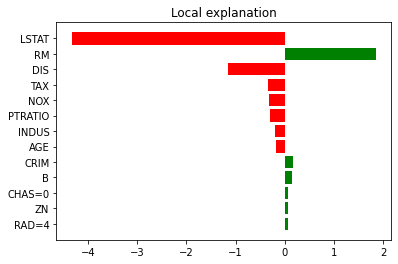

In [4]:
%matplotlib inline
fig = exp.as_pyplot_figure();

In [5]:
print("Input feature names: ")
print(boston.feature_names)
print('\n')

print("Input feature values: ")
print(test[i])
print('\n')

print("Predicted: ")
print(rf.predict(test)[i])

Input feature names: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Input feature values: 
[4.3790e-02 8.0000e+01 3.3700e+00 0.0000e+00 3.9800e-01 5.7870e+00
 3.1100e+01 6.6115e+00 4.0000e+00 3.3700e+02 1.6100e+01 3.9690e+02
 1.0240e+01]


Predicted: 
20.15639999999994


# SP-LIME pick step

### Maximize the 'coverage' function:

$c(V,W,I) = \sum_{j=1}^{d^{\prime}}{\mathbb{1}_{[\exists i \in V : W_{ij}>0]}I_j}$

$W = \text{Explanation Matrix,  } n\times d^{\prime}$

$V = \text{Set of chosen explanations}$

$I = \text{Global feature importance vector,   } I_j = \sqrt{\sum_i{|W_{ij}|}}$

In [6]:
import lime

In [7]:
import warnings
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, train, rf.predict, sample_size=20, num_features=14, num_exps_desired=5)

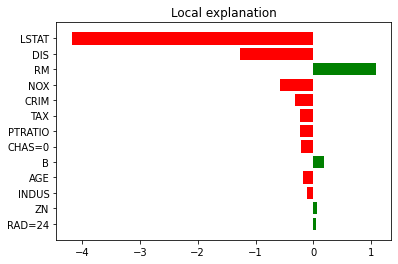

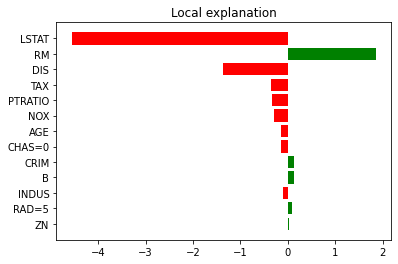

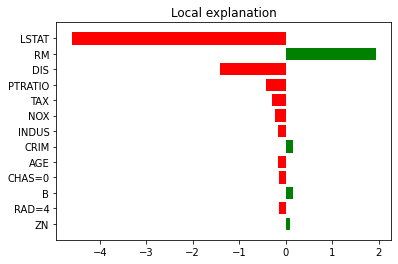

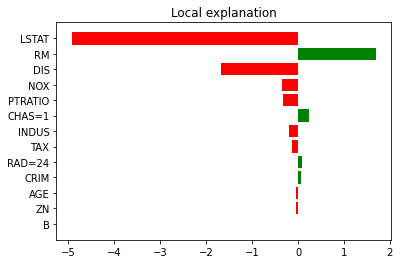

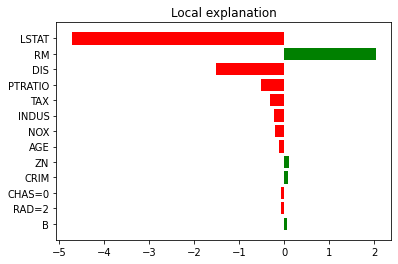

In [8]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [9]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

ModuleNotFoundError: No module named 'pandas'

In [ ]:
W.head()

,AGE,B,CHAS=0,CHAS=1,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD=24,RAD=3,RAD=4,RAD=5,RAD=7,RM,TAX,ZN
0,-0.080724,0.124994,-0.214342,NaN,0.181336,-1.298673,-0.161573,-4.601277,-0.192838,-0.423889,NaN,NaN,NaN,-0.003099,NaN,1.852061,-0.320556,0.012300
1,-0.057718,0.037930,-0.250741,NaN,0.017215,-1.414275,-0.147413,-4.916553,-0.409355,-0.448896,-0.047497,NaN,NaN,NaN,NaN,1.740887,-0.219528,0.011163
2,-0.108377,0.108911,-0.081349,NaN,0.000332,-1.151193,-0.185450,-4.491332,-0.361803,-0.364918,NaN,NaN,-0.025486,NaN,NaN,1.699323,-0.307213,0.016454
3,-0.138040,0.080173,NaN,0.20563,-0.080418,-1.194666,-0.139015,-4.221639,-0.309510,-0.380089,NaN,NaN,-0.084104,NaN,NaN,1.567589,-0.185666,0.064908
4,-0.186729,0.137872,0.094365,NaN,-0.240311,-1.089373,-0.077094,-4.997545,-0.546299,-0.498371,0.055739,NaN,NaN,NaN,NaN,1.506781,-0.216876,-0.084339


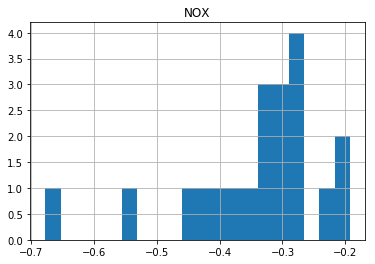

In [ ]:
im=W.hist('NOX',bins=20)

## Text explainer using the newsgroups

In [ ]:
# run the text explainer example notebook, up to single explanation
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

/mnt/c/Users/marcotcr/work/lime/python3env/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Document id: 83
Probability(christian) = 0.442
True class: atheism


In [ ]:
sp_obj = submodular_pick.SubmodularPick(explainer, newsgroups_test.data, c.predict_proba, sample_size=2, num_features=6,num_exps_desired=2)

/mnt/c/Users/marcotcr/work/lime/python3env/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/mnt/c/Users/marcotcr/work/lime/python3env/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


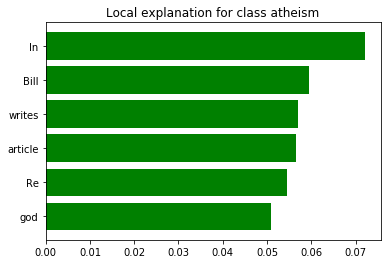

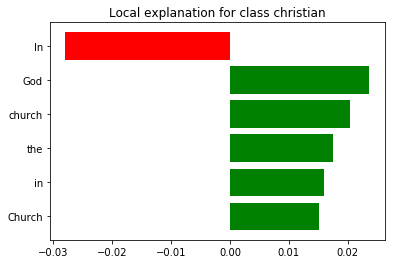

In [ ]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];

In [10]:
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,ytrain,ytest=tts(iris.data,iris.target,test_size=.2)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.9666666666666667

In [11]:
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain, 
                                                   feature_names=iris.feature_names,
                                                   class_names=iris.target_names, 
                                                   verbose=False, 
                                                   mode='classification',
                                                   discretize_continuous=False)

In [12]:
exp=explainer.explain_instance(Xtrain[i],rf.predict_proba,top_labels=3)
exp.available_labels()

[1, 2, 0]

In [13]:
sp_obj = submodular_pick.SubmodularPick(data=Xtrain,explainer=explainer,num_exps_desired=5,predict_fn=rf.predict_proba, sample_size=20, num_features=4, top_labels=3)

In [14]:
import pandas as pd
df=pd.DataFrame({})
for this_label in range(3):
    dfl=[]
    for i,exp in enumerate(sp_obj.sp_explanations):
        l=exp.as_list(label=this_label)
        l.append(("exp number",i))
        dfl.append(dict(l))
    dftest=pd.DataFrame(dfl)
    df=df.append(pd.DataFrame(dfl,index=[iris.target_names[this_label] for i in range(len(sp_obj.sp_explanations))]))
df

ModuleNotFoundError: No module named 'pandas'